
<h3 style="text-align:center;">************************************************</h3>  

<h1 style="text-align:center;">Exploratory Analysis of COVID data</h1>  
<h1 style="text-align:center;">Part 1 of predicting-disease-outbreaks-with-time-series-analysis</h1>  

<br><br>

<h3 style="text-align:center;">Eric Callanan</h3>  
<h3 style="text-align:center;">April 10 2021</h3>  

<h3 style="text-align:center;">************************************************</h3>  


https://liveproject.manning.com/module/222_2_1/predicting-disease-outbreaks-with-time-series-analysis/1--eliciting-and-loading-data-from-official-sources/1-1--eliciting-and-loading-data-from-official-sources?

---

# Contents  

1. [Objective.](#objective)  
2. [Load and review data for Confirmed Cases of COVID globally.](#confirmed-global)  
3. [Load and review data for Deaths from COVID globally.](#deaths-global)  
4. [Load and review data for Recovered from COVID globally.](#recovered-global)  
5. [Load and review data for Confirmed Cases from COVID in US data.](#confirmed-us)  
6. [Load and review data for Deaths from COVID in US data.](#deaths-us)  
7. [Load the country-specific data.](#country-specific)  
8. [Conclusion](#conclusion)

---

<a id="objective"></a>

## Objective

* Get started with the COVID analysis by loading the official Johns Hopkins data from online raw CSV files.

* Perform an initial exploration of the loaded data to get an understanding of the variables and types of questions that can be answered.

In [2]:
# Import required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id="confirmed-global"></a>

## Load and review data for Confirmed Cases of COVID globally.

Load data into Pandas dataframes directly from Johns Hopkins data repository.


In [3]:
# Confirmed Global Cases: time series data for forecasting
confirmed_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed_df = pd.read_csv(confirmed_path)

print(f"Shape of confirmed dataframe = {confirmed_df.shape}")

Shape of confirmed dataframe = (274, 448)


### Confirmed Cases

The head of the dataframe shows that the data contains daily numbers of confirmed cases for country/region from January 22 2020 up to April 09 2021.

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242


In [5]:
# Review the corners of the dataframe
confirmed_df.iloc[[0, 1, 2, 3, -4, -3, -2, -1], [0, 1, 5, 6, -4, -3, -2, -1]]

,Province/State,Country/Region,1/23/20,1/24/20,4/6/21,4/7/21,4/8/21,4/9/21
0,NaN,Afghanistan,0,0,56779,56873,56943,57019
1,NaN,Albania,0,0,126936,127192,127509,127795
2,NaN,Algeria,0,0,117879,118004,118116,118251
3,NaN,Andorra,0,0,12328,12363,12409,12456
270,NaN,West Bank and Gaza,0,0,256461,259133,262017,264395
271,NaN,Yemen,0,0,4975,5047,5133,5233
272,NaN,Zambia,0,0,89071,89386,89592,89783
273,NaN,Zimbabwe,0,0,36966,36984,37052,37147


In [6]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/31/21', '4/1/21', '4/2/21', '4/3/21', '4/4/21', '4/5/21', '4/6/21',
       '4/7/21', '4/8/21', '4/9/21'],
      dtype='object', length=448)

### Country/Region

The confirmed dataset contains 274 rows. Putting the country/region data into a set and comparing with the list shows that there are 192 unique country/regions.

There are seven countries with multiple entries in Country/Region field. This is done to provide more information for Province/State. A closer look at Australia shows that the numbers are broken down into 8 Province/States.  

* 'Australia',
* 'Canada',
* 'China',
* 'Denmark',
* 'France',
* 'Netherlands',
* 'United Kingdom'

The data can be grouped by Country/Region to get the total numbers per country.

In [7]:
confirmed_df['Country/Region'].head(10)

0            Afghanistan
1                Albania
2                Algeria
3                Andorra
4                 Angola
5    Antigua and Barbuda
6              Argentina
7                Armenia
8              Australia
9              Australia
Name: Country/Region, dtype: object

In [8]:
# Compare the total country count with the unique country count
print(f"Number of country/region entries        = {len(confirmed_df['Country/Region'])}")
print(f"Number of unique country/region entries = {len(set(confirmed_df['Country/Region']))}")

Number of country/region entries        = 274
Number of unique country/region entries = 192


In [9]:
# List all 'Country/Region's that contain more than a single entry
set(confirmed_df.groupby(by=['Country/Region']).filter(lambda group: len(group) > 1)['Country/Region'])

{'Australia',
 'Canada',
 'China',
 'Denmark',
 'France',
 'Netherlands',
 'United Kingdom'}

In [10]:
# Detailed look at one of the 'Country/Region's that contain more than a single entry
confirmed_df[confirmed_df["Country/Region"] == "Australia"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,123,123,123,123,123,123,123,123,123,123
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,5296,5296,5299,5300,5303,5310,5316,5318,5320,5324
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,108,109,111,112,112,112,112,112,112,112
11,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,1477,1485,1488,1489,1492,1491,1497,1500,1501,1502
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,656,658,658,659,661,661,662,663,665,665
13,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,...,234,234,234,234,234,234,234,234,234,234
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,20484,20484,20484,20484,20484,20484,20484,20484,20484,20485
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,944,944,944,947,948,950,951,951,951,951


### Group data by 'Country/Region'

Group data by 'Country/Region' to get a single daily number for each country.

In [11]:
confirmed_by_country_df = confirmed_df.groupby(by=['Country/Region'], as_index=False, sort=True).sum()

print(f"Shape of confirmed_by_country_df = {confirmed_by_country_df.shape}")
confirmed_by_country_df.head()

Shape of confirmed_by_country_df = (192, 447)


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242


### Review data for latest date

In [12]:
# The latest numbers for each country
confirmed_by_country_df[['Country/Region', confirmed_by_country_df.columns[-1]]]

,Country/Region,4/9/21
0,Afghanistan,57019
1,Albania,127795
2,Algeria,118251
3,Andorra,12456
4,Angola,23242
...,...,...
187,Vietnam,2683
188,West Bank and Gaza,264395
189,Yemen,5233
190,Zambia,89783


In [13]:
# The top ten countries with the highest number of confirmed cases
confirmed_by_country_df[
    ["Country/Region", confirmed_by_country_df.columns[-1]]
].sort_values(by=[confirmed_by_country_df.columns[-1]], ascending=False).head(10)

,Country/Region,4/9/21
178,US,31084065
23,Brazil,13373174
79,India,13060542
62,France,5000314
142,Russia,4572053
182,United Kingdom,4380167
177,Turkey,3745657
85,Italy,3736526
162,Spain,3347512
66,Germany,2990724


In [14]:
# The ten countries with the lowest number of confirmed cases
confirmed_by_country_df[
    ["Country/Region", confirmed_by_country_df.columns[-1]]
].sort_values(by=[confirmed_by_country_df.columns[-1]], ascending=True).head(10)

,Country/Region,4/9/21
115,Micronesia,1
147,Samoa,3
185,Vanuatu,3
111,Marshall Islands,4
104,MS Zaandam,9
158,Solomon Islands,19
75,Holy See,27
144,Saint Kitts and Nevis,44
95,Laos,49
60,Fiji,68


### Reiew Data for highest country

In [15]:
# US data
confirmed_by_country_df[confirmed_by_country_df["Country/Region"] == "US"]

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
178,US,40.0,-100.0,1,1,2,2,5,5,5,...,30460834,30539868,30609690,30672664,30707596,30785390,30847348,30922386,31002264,31084065


### Plot the data for the US

A plot of the data for the US, which has the highest number of confirmed cases

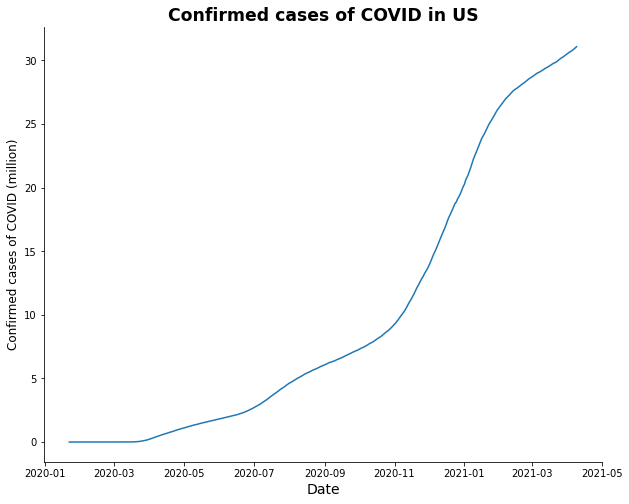

In [16]:
country = "US"

confirmed_us_df = (
    confirmed_by_country_df[confirmed_by_country_df["Country/Region"] == country]
    .drop(["Country/Region", "Lat", "Long"], axis=1)
    .copy()
)

# Convert date column names to datetime
confirmed_us_df.columns = pd.to_datetime(confirmed_us_df.columns)

dates = confirmed_us_df.columns
confirmed = confirmed_us_df.iloc[0, :] / 1000000

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(
    f"Confirmed cases of COVID in {country}",
    fontsize="xx-large",
    fontweight="bold",
)
ax.plot(dates, confirmed)
ax.set_ylabel("Confirmed cases of COVID (million)", fontsize="large")
ax.set_xlabel("Date", fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

### Global confirmed cases

The global confirmed cases can be obtained by totalling the columns in the dataset.

In [17]:
confirmed_df.drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).sum(axis=0)

1/22/20          557
1/23/20          655
1/24/20          941
1/25/20         1433
1/26/20         2118
             ...    
4/5/21     131813638
4/6/21     132419139
4/7/21     133103485
4/8/21     133943335
4/9/21     134545099
Length: 444, dtype: int64

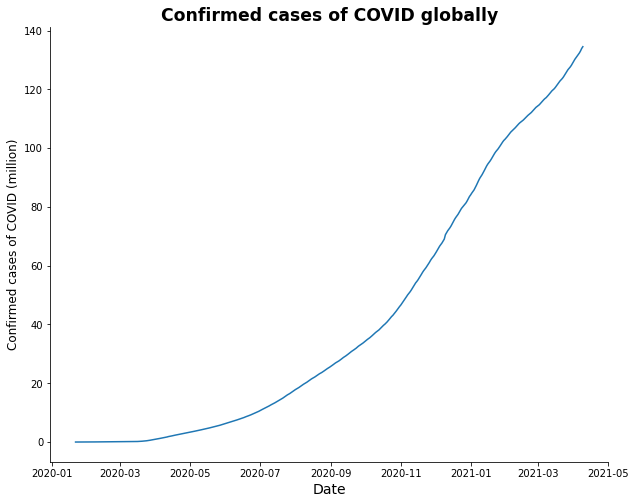

In [18]:
# Global total confirmed cases
global_data = (
    confirmed_df
    .drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
    .sum(axis=0)
    .copy()
)

# Convert date strings to datetime
global_data.index = pd.to_datetime(global_data.index)

dates = global_data.index
confirmed = global_data / 1000000

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(
    f"Confirmed cases of COVID globally",
    fontsize="xx-large",
    fontweight="bold",
)
ax.plot(dates, confirmed)
ax.set_ylabel("Confirmed cases of COVID (million)", fontsize="large")
ax.set_xlabel("Date", fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

---

<a id="deaths-global"></a>

## Load and review data for Deaths from COVID globally.

Load data into Pandas dataframes directly from Johns Hopkins data repository.



In [19]:
# Number of Death Cases - Global: time series data for deaths
deaths_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths_df = pd.read_csv(deaths_path)

print(f"Shape of deaths = {deaths_df.shape}")

Shape of deaths = (274, 448)


### Deaths

The head of the dataframe shows that the data contains daily numbers of deaths for country/region from January 22 2020 up to April 09 2021.

In [20]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2484,2489,2495,2496,2497,2508,2512,2512,2516,2521
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2235,2241,2247,2256,2265,2274,2283,2291,2297,2304
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3093,3096,3099,3102,3105,3108,3112,3116,3119,3123
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,115,115,116,117,117,117,117,119,120,120
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,537,538,538,540,542,543,547,547,549,549


In [21]:
# Review the corners of the dataframe
deaths_df.iloc[[0, 1, 2, 3, -4, -3, -2, -1], [0, 1, 5, 6, -4, -3, -2, -1]]

,Province/State,Country/Region,1/23/20,1/24/20,4/6/21,4/7/21,4/8/21,4/9/21
0,NaN,Afghanistan,0,0,2512,2512,2516,2521
1,NaN,Albania,0,0,2283,2291,2297,2304
2,NaN,Algeria,0,0,3112,3116,3119,3123
3,NaN,Andorra,0,0,117,119,120,120
270,NaN,West Bank and Gaza,0,0,2735,2753,2781,2812
271,NaN,Yemen,0,0,976,986,1004,1022
272,NaN,Zambia,0,0,1224,1224,1225,1226
273,NaN,Zimbabwe,0,0,1531,1531,1532,1535


In [22]:
deaths_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/31/21', '4/1/21', '4/2/21', '4/3/21', '4/4/21', '4/5/21', '4/6/21',
       '4/7/21', '4/8/21', '4/9/21'],
      dtype='object', length=448)

### Country/Region

The deaths dataset has the same layout as the confirmed dataset. This includes the same seven countries with multiple entries in Country/Region field. This is done to provide more information for Province/State. A closer look at Australia shows that the numbers are broken down into 8 Province/States.  

* 'Australia',
* 'Canada',
* 'China',
* 'Denmark',
* 'France',
* 'Netherlands',
* 'United Kingdom'

The data can be grouped by Country/Region to get the total numbers per country.

In [23]:
deaths_df['Country/Region'].head(10)

0            Afghanistan
1                Albania
2                Algeria
3                Andorra
4                 Angola
5    Antigua and Barbuda
6              Argentina
7                Armenia
8              Australia
9              Australia
Name: Country/Region, dtype: object

In [24]:
# Compare the total country count with the unique country count
print(f"Number of country/region entries        = {len(deaths_df['Country/Region'])}")
print(f"Number of unique country/region entries = {len(set(deaths_df['Country/Region']))}")

Number of country/region entries        = 274
Number of unique country/region entries = 192


In [25]:
# List all 'Country/Region's that contain more than a single entry
set(deaths_df.groupby(by=['Country/Region']).filter(lambda group: len(group) > 1)['Country/Region'])

{'Australia',
 'Canada',
 'China',
 'Denmark',
 'France',
 'Netherlands',
 'United Kingdom'}

In [26]:
# Detailed look at one of the 'Country/Region's that contain more than a single entry
deaths_df[deaths_df["Country/Region"] == "Australia"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
13,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,...,820,820,820,820,820,820,820,820,820,820
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9


### Group data by 'Country/Region'

Group data by 'Country/Region' to get a single daily number for each country.

In [27]:
deaths_by_country_df = deaths_df.groupby(by=['Country/Region'], as_index=False, sort=True).sum()

print(f"Shape of confirmed_by_country_df = {deaths_by_country_df.shape}")
deaths_by_country_df.head()

Shape of confirmed_by_country_df = (192, 447)


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,2484,2489,2495,2496,2497,2508,2512,2512,2516,2521
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,2235,2241,2247,2256,2265,2274,2283,2291,2297,2304
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,3093,3096,3099,3102,3105,3108,3112,3116,3119,3123
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,115,115,116,117,117,117,117,119,120,120
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,537,538,538,540,542,543,547,547,549,549


### Review data for latest date

In [28]:
# The latest numbers for each country
deaths_by_country_df[['Country/Region', deaths_by_country_df.columns[-1]]]

,Country/Region,4/9/21
0,Afghanistan,2521
1,Albania,2304
2,Algeria,3123
3,Andorra,120
4,Angola,549
...,...,...
187,Vietnam,35
188,West Bank and Gaza,2812
189,Yemen,1022
190,Zambia,1226


In [29]:
# The top ten countries with the highest number of deaths
deaths_by_country_df[
    ["Country/Region", deaths_by_country_df.columns[-1]]
].sort_values(by=[deaths_by_country_df.columns[-1]], ascending=False).head(10)

,Country/Region,4/9/21
178,US,561058
23,Brazil,348718
114,Mexico,207020
79,India,167642
182,United Kingdom,127284
85,Italy,113579
142,Russia,100554
62,France,98202
66,Germany,78295
162,Spain,76328


In [30]:
# The twenty countries with the lowest number of deaths
deaths_by_country_df[
    ["Country/Region", deaths_by_country_df.columns[-1]]
].sort_values(by=[deaths_by_country_df.columns[-1]], ascending=True).head(20)

,Country/Region,4/9/21
95,Laos,0
144,Saint Kitts and Nevis,0
147,Samoa,0
50,Dominica,0
158,Solomon Islands,0
115,Micronesia,0
111,Marshall Islands,0
75,Holy See,0
185,Vanuatu,0
69,Grenada,1


### Reiew Data for highest country

In [31]:
# US data
deaths_by_country_df[deaths_by_country_df["Country/Region"] == "US"]

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
178,US,40.0,-100.0,0,0,0,0,0,0,0,...,552202,553268,554201,554913,555196,555711,556546,559116,560116,561058


### Plot the data for the US

A plot of the data for the US, which has the highest number of deaths

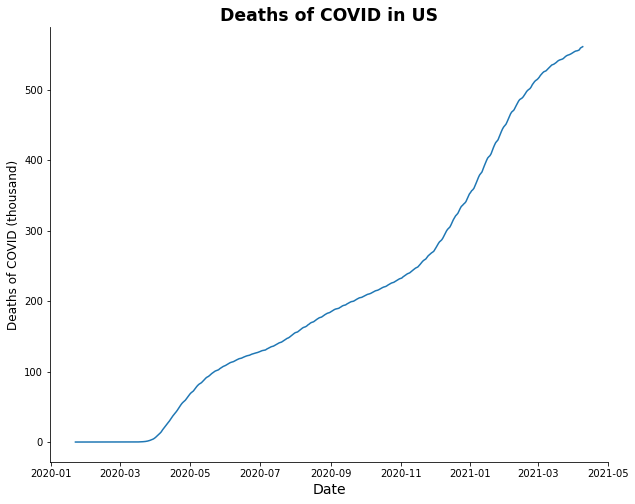

In [32]:
country = "US"

deaths_us_df = (
    deaths_by_country_df[deaths_by_country_df["Country/Region"] == country]
    .drop(["Country/Region", "Lat", "Long"], axis=1)
    .copy()
)

# Convert date column names to datetime
deaths_us_df.columns = pd.to_datetime(deaths_us_df.columns)

dates = deaths_us_df.columns
deaths = deaths_us_df.iloc[0, :] / 1000

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(
    f"Deaths of COVID in {country}",
    fontsize="xx-large",
    fontweight="bold",
)
ax.plot(dates, deaths)
ax.set_ylabel("Deaths of COVID (thousand)", fontsize="large")
ax.set_xlabel("Date", fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

### Global Deaths

The global Deaths can be obtained by totalling the columns in the dataset.

In [33]:
deaths_df.drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).sum(axis=0)

1/22/20         17
1/23/20         18
1/24/20         26
1/25/20         42
1/26/20         56
            ...   
4/5/21     2860652
4/6/21     2872453
4/7/21     2887278
4/8/21     2901909
4/9/21     2914590
Length: 444, dtype: int64

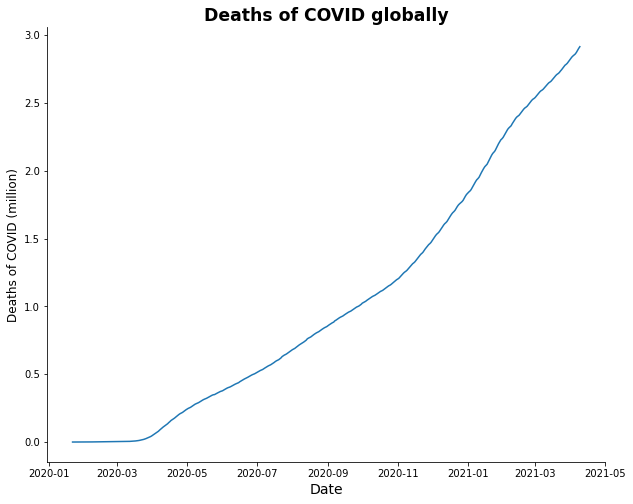

In [34]:
# Global total confirmed cases
global_data = (
    deaths_df
    .drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
    .sum(axis=0)
    .copy()
)

# Convert date strings to datetime
global_data.index = pd.to_datetime(global_data.index)

dates = global_data.index
deaths = global_data / 1000000

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(
    f"Deaths of COVID globally",
    fontsize="xx-large",
    fontweight="bold",
)
ax.plot(dates, deaths)
ax.set_ylabel("Deaths of COVID (million)", fontsize="large")
ax.set_xlabel("Date", fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

---

<a id="recovered-global"></a>

## Load and review data for Recovered from COVID globally.

Load data into Pandas dataframes directly from Johns Hopkins data repository.



In [35]:
# Number of recovered cases - Global: time series data for recovered cases
recovered_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recovered_df = pd.read_csv(recovered_path)

print(f"Shape of confirmed = {recovered_df.shape}")

Shape of confirmed = (259, 448)


### Recovered

The head of the dataframe shows that the data contains daily numbers of Recovered Cases for country/region from January 22 2020 up to April 09 2021.

In [36]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,51550,51788,51798,51802,51885,51902,51928,51940,51956,51961
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,91271,91875,92500,93173,93842,94431,95035,95600,96129,96672
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,81538,81632,81729,81813,81896,81994,82096,82192,82289,82392
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11315,11365,11401,11428,11474,11523,11570,11616,11692,11732
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20493,20508,20867,20871,20879,21452,21489,21545,21557,21589


In [37]:
# Review the corners of the dataframe
recovered_df.iloc[[0, 1, 2, 3, -4, -3, -2, -1], [0, 1, 5, 6, -4, -3, -2, -1]]

,Province/State,Country/Region,1/23/20,1/24/20,4/6/21,4/7/21,4/8/21,4/9/21
0,NaN,Afghanistan,0,0,51928,51940,51956,51961
1,NaN,Albania,0,0,95035,95600,96129,96672
2,NaN,Algeria,0,0,82096,82192,82289,82392
3,NaN,Andorra,0,0,11570,11616,11692,11732
255,NaN,West Bank and Gaza,0,0,224552,226090,227988,229876
256,NaN,Yemen,0,0,1822,1886,1946,1987
257,NaN,Zambia,0,0,85338,85409,85446,85559
258,NaN,Zimbabwe,0,0,34781,34803,34814,34831


In [38]:
recovered_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/31/21', '4/1/21', '4/2/21', '4/3/21', '4/4/21', '4/5/21', '4/6/21',
       '4/7/21', '4/8/21', '4/9/21'],
      dtype='object', length=448)

### Country/Region

The Recovered dataset has the same layout as the confirmed dataset. Only six of the countries have multiple entries in Country/Region field. This is done to provide more information for Province/State. A closer look at Australia shows that the numbers are broken down into 8 Province/States. 

* 'Australia',
* 'China',
* 'Denmark',
* 'France',
* 'Netherlands',
* 'United Kingdom'

Canada is only present once in the recovered dataset and does not break down the numbers by Province/State. 
The data can be grouped by Country/Region to get the total numbers per country.

In [39]:
recovered_df['Country/Region'].head(10)

0            Afghanistan
1                Albania
2                Algeria
3                Andorra
4                 Angola
5    Antigua and Barbuda
6              Argentina
7                Armenia
8              Australia
9              Australia
Name: Country/Region, dtype: object

In [40]:
# Compare the total country count with the unique country count
print(f"Number of country/region entries        = {len(recovered_df['Country/Region'])}")
print(f"Number of unique country/region entries = {len(set(recovered_df['Country/Region']))}")

Number of country/region entries        = 259
Number of unique country/region entries = 192


In [41]:
# List all 'Country/Region's that contain more than a single entry
set(recovered_df.groupby(by=['Country/Region']).filter(lambda group: len(group) > 1)['Country/Region'])

{'Australia', 'China', 'Denmark', 'France', 'Netherlands', 'United Kingdom'}

In [42]:
# Detailed look at Canada, which does not contain data per Province/State in recovered data
recovered_df[recovered_df["Country/Region"] == "Canada"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
39,NaN,Canada,56.1304,-106.3468,0,0,0,0,0,0,...,918581,922632,924144,929085,930750,937403,945550,950990,956665,962451


In [43]:
# Detailed look at one of the 'Country/Region's that contain more than a single entry
recovered_df[recovered_df["Country/Region"] == "Australia"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,120,120,120,120,120,120,120,120,120,120
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,106,106,106,106,106,106,106,106,107,107
11,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,1343,1344,1353,1353,1353,1366,1366,1366,1376,1381
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,640,641,641,642,644,649,649,651,651,654
13,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,...,221,221,221,221,221,221,221,221,221,221
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,...,19664,19663,19663,19663,19663,19663,19663,19664,19664,19664
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,918,919,921,922,925,923,924,928,932,933


### Group data by 'Country/Region'

Group data by 'Country/Region' to get a single daily number for each country.

In [44]:
recovered_by_country_df = recovered_df.groupby(by=['Country/Region'], as_index=False, sort=True).sum()

print(f"Shape of recovered_by_country_df = {recovered_by_country_df.shape}")
recovered_by_country_df.head()

Shape of recovered_by_country_df = (192, 447)


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,51550,51788,51798,51802,51885,51902,51928,51940,51956,51961
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,91271,91875,92500,93173,93842,94431,95035,95600,96129,96672
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,81538,81632,81729,81813,81896,81994,82096,82192,82289,82392
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,11315,11365,11401,11428,11474,11523,11570,11616,11692,11732
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,20493,20508,20867,20871,20879,21452,21489,21545,21557,21589


### Review data for latest date

In [45]:
# The latest numbers for each country
recovered_by_country_df[['Country/Region', recovered_by_country_df.columns[-1]]]

,Country/Region,4/9/21
0,Afghanistan,51961
1,Albania,96672
2,Algeria,82392
3,Andorra,11732
4,Angola,21589
...,...,...
187,Vietnam,2429
188,West Bank and Gaza,229876
189,Yemen,1987
190,Zambia,85559


In [46]:
# The top ten countries with the highest number of recovered
recovered_by_country_df[
    ["Country/Region", recovered_by_country_df.columns[-1]]
].sort_values(by=[recovered_by_country_df.columns[-1]], ascending=False).head(10)

,Country/Region,4/9/21
79,India,11913292
23,Brazil,11722181
142,Russia,4200282
177,Turkey,3268678
85,Italy,3086586
66,Germany,2654930
37,Colombia,2365566
6,Argentina,2203926
138,Poland,2107776
114,Mexico,1765244


In [47]:
# The twenty countries with the lowest number of recovered
recovered_by_country_df[
    ["Country/Region", recovered_by_country_df.columns[-1]]
].sort_values(by=[recovered_by_country_df.columns[-1]], ascending=True).head(20)

,Country/Region,4/9/21
166,Sweden,0
178,US,0
152,Serbia,0
16,Belgium,0
185,Vanuatu,1
115,Micronesia,1
147,Samoa,2
111,Marshall Islands,4
104,MS Zaandam,7
75,Holy See,15


### Reiew Data for highest country

In [48]:
# India data
recovered_by_country_df[recovered_by_country_df["Country/Region"] == "India"]

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
79,India,20.593684,78.96288,0,0,0,0,0,0,0,...,11474683,11525039,11569241,11629289,11682136,11732279,11792135,11851393,11913292,11913292


### Plot the data for the India

A plot of the data for the India, which has the highest number of Recovered

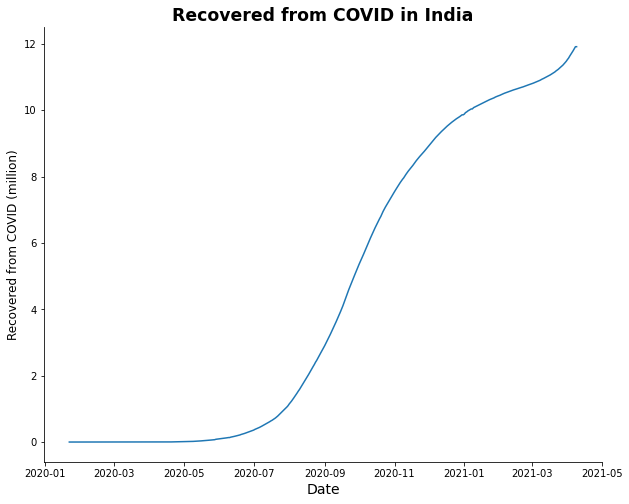

In [49]:
country = "India"

recovered_us_df = (
    recovered_by_country_df[recovered_by_country_df["Country/Region"] == country]
    .drop(["Country/Region", "Lat", "Long"], axis=1)
    .copy()
)

# Convert date column names to datetime
recovered_us_df.columns = pd.to_datetime(recovered_us_df.columns)

dates = recovered_us_df.columns
deaths = recovered_us_df.iloc[0, :] / 1000000

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(
    f"Recovered from COVID in {country}",
    fontsize="xx-large",
    fontweight="bold",
)
ax.plot(dates, deaths)
ax.set_ylabel("Recovered from COVID (million)", fontsize="large")
ax.set_xlabel("Date", fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

### Global Recovered

The global Recovered cases can be obtained by totalling the columns in the dataset.

In [50]:
recovered_df.drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).sum(axis=0)

1/22/20          30
1/23/20          32
1/24/20          39
1/25/20          42
1/26/20          56
             ...   
4/5/21     74819638
4/6/21     75186315
4/7/21     75666178
4/8/21     76113059
4/9/21     76431322
Length: 444, dtype: int64

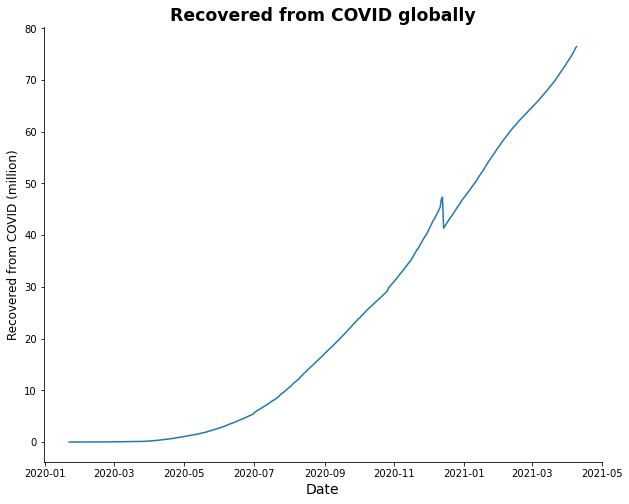

In [51]:
# Global total confirmed cases
global_data = (
    recovered_df
    .drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
    .sum(axis=0)
    .copy()
)

# Convert date strings to datetime
global_data.index = pd.to_datetime(global_data.index)

dates = global_data.index
deaths = global_data / 1000000

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(
    f"Recovered from COVID globally",
    fontsize="xx-large",
    fontweight="bold",
)
ax.plot(dates, deaths)
ax.set_ylabel("Recovered from COVID (million)", fontsize="large")
ax.set_xlabel("Date", fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

---

<a id="confirmed-us"></a>

## Load and review data for Confirmed Cases from COVID in US data.

Load data into Pandas dataframes directly from Johns Hopkins data repository.


In [52]:
# US Confirmed Cases: us_confirmed_df
us_confirmed_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
us_confirmed_df = pd.read_csv(us_confirmed_path)

print(f"Shape of us confirmed = {us_confirmed_df.shape}")
us_confirmed_df.head()

Shape of us confirmed = (3342, 455)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,6589,6595,6606,6617,6619,6620,6644,6675,6702,6710
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,20505,20523,20519,20526,20541,20542,20551,20573,20588,20600
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2227,2227,2228,2231,2232,2232,2238,2239,2244,2245
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2542,2543,2544,2545,2546,2546,2549,2557,2560,2561
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,6444,6446,6455,6458,6459,6460,6462,6469,6472,6475


In [53]:
# Review the corners of the dataframe
us_confirmed_df.iloc[[0, 1, 2, 3, -4, -3, -2, -1], [0, 1, 5, 6, -4, -3, -2, -1]]

,UID,iso2,Admin2,Province_State,4/6/21,4/7/21,4/8/21,4/9/21
0,84001001,US,Autauga,Alabama,6644,6675,6702,6710
1,84001003,US,Baldwin,Alabama,20551,20573,20588,20600
2,84001005,US,Barbour,Alabama,2238,2239,2244,2245
3,84001007,US,Bibb,Alabama,2549,2557,2560,2561
3338,84056041,US,Uinta,Wyoming,2135,2140,2140,2142
3339,84090056,US,Unassigned,Wyoming,0,0,0,0
3340,84056043,US,Washakie,Wyoming,892,892,893,897
3341,84056045,US,Weston,Wyoming,635,639,639,640


In [54]:
print(list(us_confirmed_df.columns)[:15])

['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20', '1/24/20', '1/25/20']


In [55]:
# Compare the total country count with the unique country count
print(f"Number of country/region entries        = {len(us_confirmed_df['Country_Region'])}")
print(f"Number of unique country/region entries = {len(set(us_confirmed_df['Country_Region']))}")

print(f"Number of Province_State entries        = {len(us_confirmed_df['Province_State'])}")
print(f"Number of unique Province_State entries = {len(set(us_confirmed_df['Province_State']))}")

Number of country/region entries        = 3342
Number of unique country/region entries = 1
Number of Province_State entries        = 3342
Number of unique Province_State entries = 58


### Province_State

The confirmed dataset for the US contains 3340 rows. Putting the Province_State data into a set and comparing with the list shows that there are 58 unique Province_States. 50 states plus territories and cruise ships.

Each of the Province_States contain multiple entries, with data for different sub-regions. These areas are in a field called "Admin2".

The data can be grouped by Province_State to get the total numbers per State.

In [56]:
states = set(us_confirmed_df['Province_State'])
print(f"Number of Province_States = {len(states)}\n")
print(states)

Number of Province_States = 58

{'New Mexico', 'Washington', 'Maine', 'Maryland', 'West Virginia', 'Vermont', 'Mississippi', 'Ohio', 'Northern Mariana Islands', 'Nevada', 'North Carolina', 'Guam', 'Missouri', 'Oregon', 'Texas', 'Puerto Rico', 'Indiana', 'Grand Princess', 'Alaska', 'Alabama', 'New Jersey', 'Kentucky', 'Louisiana', 'New Hampshire', 'Rhode Island', 'New York', 'Georgia', 'Massachusetts', 'Oklahoma', 'Tennessee', 'Arkansas', 'Florida', 'Kansas', 'Colorado', 'Minnesota', 'American Samoa', 'Wisconsin', 'Utah', 'Virgin Islands', 'Wyoming', 'California', 'Michigan', 'South Dakota', 'District of Columbia', 'Illinois', 'Connecticut', 'Pennsylvania', 'Virginia', 'Idaho', 'South Carolina', 'Arizona', 'Delaware', 'Diamond Princess', 'Nebraska', 'North Dakota', 'Iowa', 'Montana', 'Hawaii'}


In [57]:
us_confirmed_df[['Admin2', 'Province_State']].head(10)

,Admin2,Province_State
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama
5,Bullock,Alabama
6,Butler,Alabama
7,Calhoun,Alabama
8,Chambers,Alabama
9,Cherokee,Alabama


In [58]:
# List all 'Province_State's that contain only a single entry
us_confirmed_df.groupby(by=['Province_State']).filter(lambda group: len(group) == 1)['Province_State']

102               American Samoa
338             Diamond Princess
572               Grand Princess
573                         Guam
2123    Northern Mariana Islands
3009              Virgin Islands
Name: Province_State, dtype: object

The "Combined_Key" field seems to be a combination of the country, the state and the county/region.
There are a number of cases in states without any futher sub-regions assigned - 'Unassigned' in Admin2 field.

In [59]:
us_confirmed_df[['Admin2', 'Province_State', 'Combined_Key']]

,Admin2,Province_State,Combined_Key
0,Autauga,Alabama,"Autauga, Alabama, US"
1,Baldwin,Alabama,"Baldwin, Alabama, US"
2,Barbour,Alabama,"Barbour, Alabama, US"
3,Bibb,Alabama,"Bibb, Alabama, US"
4,Blount,Alabama,"Blount, Alabama, US"
...,...,...,...
3337,Teton,Wyoming,"Teton, Wyoming, US"
3338,Uinta,Wyoming,"Uinta, Wyoming, US"
3339,Unassigned,Wyoming,"Unassigned, Wyoming, US"
3340,Washakie,Wyoming,"Washakie, Wyoming, US"


In [60]:
# Unassigned
us_confirmed_df[us_confirmed_df["Admin2"] == "Unassigned"]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
64,84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
97,84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,...,276,275,277,277,277,284,284,286,288,294
117,84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
190,84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,...,2791,2796,2803,2799,2798,2791,2795,2801,2806,2809
253,84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,...,0,0,0,0,0,0,0,59,39,59
319,84090008,US,USA,840,90008.0,Unassigned,Colorado,US,0.0,0.0,...,57,57,57,59,59,59,59,59,59,59
331,84090009,US,USA,840,90009.0,Unassigned,Connecticut,US,0.0,0.0,...,1089,1099,1103,1103,1103,1113,1118,1123,1121,1125
337,84090010,US,USA,840,90010.0,Unassigned,Delaware,US,0.0,0.0,...,204,206,205,204,204,204,203,204,204,204
341,84090011,US,USA,840,90011.0,Unassigned,District of Columbia,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
405,84090012,US,USA,840,90012.0,Unassigned,Florida,US,0.0,0.0,...,3561,3568,3569,3577,3578,3577,3588,3596,3604,3610


### Group data by 'Province_State'

Group data by 'Province_State' to get a single daily number for each Province_State.

In [61]:
us_confirmed_by_state_df = us_confirmed_df.groupby(by=['Province_State'], as_index=False, sort=True).sum()

print(f"Shape of us_confirmed_by_state_df = {us_confirmed_by_state_df.shape}")
us_confirmed_by_state_df.head()

Shape of us_confirmed_by_state_df = (58, 450)


,Province_State,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,Alabama,5796241491,57960,241491.0,2203.246784,-5809.578199,0,0,0,0,...,515388,515866,516266,516615,516809,516918,517114,517452,517916,518234
1,Alaska,2772236473,27720,236473.0,1868.733025,-4605.860811,0,0,0,0,...,62901,63298,63501,63501,63501,64001,64081,64303,64531,64782
2,American Samoa,16,16,60.0,-14.271000,-170.132000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,1428230216,14280,230216.0,505.138555,-1671.948482,0,0,0,0,...,841811,842192,843132,843838,844302,844910,845480,846230,846900,848202
4,Arkansas,6468550635,64680,550635.0,2618.391704,-6932.548370,0,0,0,0,...,330398,330609,330753,330970,331054,331098,331261,331505,331704,331882


### Review data for latest date

In [62]:
# The latest numbers for each State
us_confirmed_by_state_df[['Province_State', us_confirmed_by_state_df.columns[-1]]]

,Province_State,4/9/21
0,Alabama,518234
1,Alaska,64782
2,American Samoa,0
3,Arizona,848202
4,Arkansas,331882
5,California,3692777
6,Colorado,475989
7,Connecticut,321586
8,Delaware,97784
9,Diamond Princess,49


In [63]:
# The top ten States with the highest number of confirmed cases
us_confirmed_by_state_df[
    ["Province_State", us_confirmed_by_state_df.columns[-1]]
].sort_values(by=[us_confirmed_by_state_df.columns[-1]], ascending=False).head(10)

,Province_State,4/9/21
5,California,3692777
49,Texas,2822889
11,Florida,2111807
36,New York,1942469
17,Illinois,1273085
12,Georgia,1071130
43,Pennsylvania,1066707
40,Ohio,1035552
34,New Jersey,946504
37,North Carolina,929406


In [64]:
# The top ten States with the lowest number of confirmed cases
us_confirmed_by_state_df[
    ["Province_State", us_confirmed_by_state_df.columns[-1]]
].sort_values(by=[us_confirmed_by_state_df.columns[-1]], ascending=True).head(10)

,Province_State,4/9/21
2,American Samoa,0
9,Diamond Princess,49
13,Grand Princess,103
39,Northern Mariana Islands,160
52,Virgin Islands,2971
14,Guam,7833
51,Vermont,20815
15,Hawaii,31862
10,District of Columbia,45634
23,Maine,53434


### Reiew Data for highest State

In [65]:
# US data
us_confirmed_by_state_df[us_confirmed_by_state_df["Province_State"] == "California"]

,Province_State,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
5,California,5040521376,50400,521376.0,2194.949775,-7002.258461,0,0,0,0,...,3668745,3671349,3675191,3676092,3676742,3682861,3685045,3687493,3690031,3692777


### Plot the data for the California

A plot of the data for the State of California, which has the highest number of confirmed cases

In [66]:
us_confirmed_by_state_df.columns

Index(['Province_State', 'UID', 'code3', 'FIPS', 'Lat', 'Long_', '1/22/20',
       '1/23/20', '1/24/20', '1/25/20',
       ...
       '3/31/21', '4/1/21', '4/2/21', '4/3/21', '4/4/21', '4/5/21', '4/6/21',
       '4/7/21', '4/8/21', '4/9/21'],
      dtype='object', length=450)

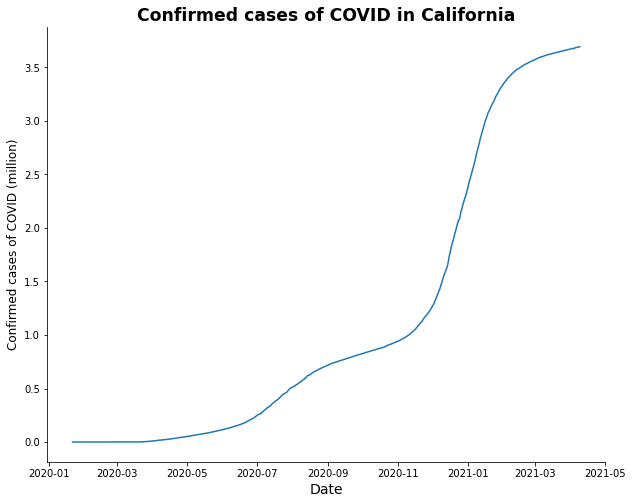

In [67]:
state = "California"

confirmed_state_df = (
    us_confirmed_by_state_df[us_confirmed_by_state_df["Province_State"] == state]
    .drop(["Province_State", "UID", "code3", "FIPS", "Lat", "Long_"], axis=1)
    .copy()
)

# Convert date column names to datetime
confirmed_state_df.columns = pd.to_datetime(confirmed_state_df.columns)

dates = confirmed_state_df.columns
confirmed = confirmed_state_df.iloc[0, :] / 1000000

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(
    f"Confirmed cases of COVID in {state}",
    fontsize="xx-large",
    fontweight="bold",
)
ax.plot(dates, confirmed)
ax.set_ylabel("Confirmed cases of COVID (million)", fontsize="large")
ax.set_xlabel("Date", fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

### National confirmed cases

The national confirmed cases in the US from the US dataset.



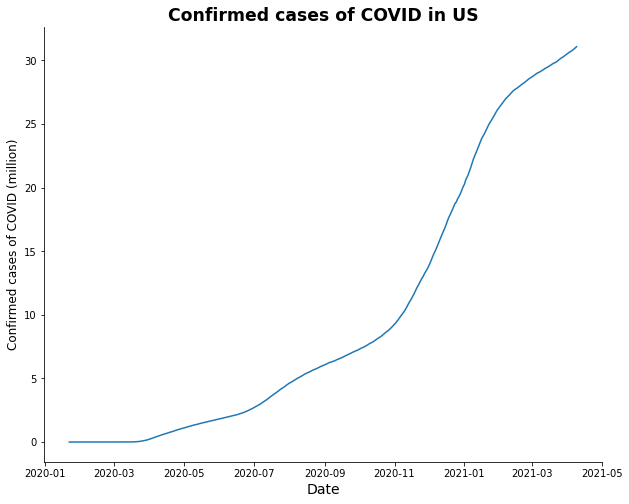

In [68]:
# US total confirmed cases
us_data = (
    us_confirmed_df.drop(
        [
            "UID",
            "iso2",
            "iso3",
            "code3",
            "FIPS",
            "Admin2",
            "Province_State",
            "Country_Region",
            "Lat",
            "Long_",
            "Combined_Key",
        ],
        axis=1,
    )
    .sum(axis=0)
    .copy()
)

# Convert date strings to datetime
us_data.index = pd.to_datetime(us_data.index)

dates = us_data.index
confirmed = us_data / 1000000

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(
    f"Confirmed cases of COVID in US",
    fontsize="xx-large",
    fontweight="bold",
)
ax.plot(dates, confirmed)
ax.set_ylabel("Confirmed cases of COVID (million)", fontsize="large")
ax.set_xlabel("Date", fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

---

<a id="deaths-us"></a>

## Load and review data for Deaths from COVID in US data.

Load data into Pandas dataframes directly from Johns Hopkins data repository.


In [69]:
# US Death Cases: us_death_df
us_deaths_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
us_deaths_df = pd.read_csv(us_deaths_path)

print(f"Shape of us deaths = {us_deaths_df.shape}")
us_deaths_df.head()

Shape of us deaths = (3342, 456)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,99,99,99,102,102,102,102,102,103,103
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,301,301,301,301,301,301,301,301,300,300
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,55,55,55,55,55,55,55,55,55,55
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,58,58,58,58,58,58,58,58,58,58
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,131,131,132,132,132,132,132,133,134,134


In [70]:
# Review the corners of the dataframe
us_deaths_df.iloc[[0, 1, 2, 3, -4, -3, -2, -1], [0, 1, 5, 6, -4, -3, -2, -1]]

,UID,iso2,Admin2,Province_State,4/6/21,4/7/21,4/8/21,4/9/21
0,84001001,US,Autauga,Alabama,102,102,103,103
1,84001003,US,Baldwin,Alabama,301,301,300,300
2,84001005,US,Barbour,Alabama,55,55,55,55
3,84001007,US,Bibb,Alabama,58,58,58,58
3338,84056041,US,Uinta,Wyoming,12,12,12,12
3339,84090056,US,Unassigned,Wyoming,0,0,0,0
3340,84056043,US,Washakie,Wyoming,26,26,26,26
3341,84056045,US,Weston,Wyoming,5,5,5,5


In [71]:
print(list(us_deaths_df.columns)[:15])

['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population', '1/22/20', '1/23/20', '1/24/20']


In [72]:
# Compare the total country and state counts with the unique counts
print(f"Number of country/region entries        = {len(us_deaths_df['Country_Region'])}")
print(f"Number of unique country/region entries = {len(set(us_deaths_df['Country_Region']))}")

print(f"Number of Province_State entries        = {len(us_deaths_df['Province_State'])}")
print(f"Number of unique Province_State entries = {len(set(us_deaths_df['Province_State']))}")

Number of country/region entries        = 3342
Number of unique country/region entries = 1
Number of Province_State entries        = 3342
Number of unique Province_State entries = 58


### Population

The Deaths dataset has a field for population for each state. This field is not present in the Confirmed Cases data, but could be used with both sets of data to determine numbers per capita.

In [73]:
us_deaths_df[['Admin2', 'Province_State', 'Population']]

,Admin2,Province_State,Population
0,Autauga,Alabama,55869
1,Baldwin,Alabama,223234
2,Barbour,Alabama,24686
3,Bibb,Alabama,22394
4,Blount,Alabama,57826
...,...,...,...
3337,Teton,Wyoming,23464
3338,Uinta,Wyoming,20226
3339,Unassigned,Wyoming,0
3340,Washakie,Wyoming,7805


### Province_State

The deaths dataset for the US contains 3340 rows. Putting the Province_State data into a set and comparing with the list shows that there are 58 unique Province_States. 50 states plus territories and cruise ships.

Each of the Province_States contain multiple entries, with data for different sub-regions. These areas are in a field called "Admin2".

The data can be grouped by Province_State to get the total numbers per State.

In [74]:
states = set(us_deaths_df['Province_State'])
print(f"Number of Province_States = {len(states)}\n")
print(states)

Number of Province_States = 58

{'New Mexico', 'Washington', 'Maine', 'Maryland', 'West Virginia', 'Vermont', 'Mississippi', 'Ohio', 'Northern Mariana Islands', 'Nevada', 'North Carolina', 'Guam', 'Missouri', 'Oregon', 'Texas', 'Puerto Rico', 'Indiana', 'Grand Princess', 'Alaska', 'Alabama', 'New Jersey', 'Kentucky', 'Louisiana', 'New Hampshire', 'Rhode Island', 'New York', 'Georgia', 'Massachusetts', 'Oklahoma', 'Tennessee', 'Arkansas', 'Florida', 'Kansas', 'Colorado', 'Minnesota', 'American Samoa', 'Wisconsin', 'Utah', 'Virgin Islands', 'Wyoming', 'California', 'Michigan', 'South Dakota', 'District of Columbia', 'Illinois', 'Connecticut', 'Pennsylvania', 'Virginia', 'Idaho', 'South Carolina', 'Arizona', 'Delaware', 'Diamond Princess', 'Nebraska', 'North Dakota', 'Iowa', 'Montana', 'Hawaii'}


In [75]:
us_deaths_df[['Admin2', 'Province_State']].head(10)

,Admin2,Province_State
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama
5,Bullock,Alabama
6,Butler,Alabama
7,Calhoun,Alabama
8,Chambers,Alabama
9,Cherokee,Alabama


In [76]:
# List all 'Province_State's that contain only a single entry
us_deaths_df.groupby(by=['Province_State']).filter(lambda group: len(group) == 1)['Province_State']

102               American Samoa
338             Diamond Princess
572               Grand Princess
573                         Guam
2123    Northern Mariana Islands
3009              Virgin Islands
Name: Province_State, dtype: object

The "Combined_Key" field seems to be a combination of the country, the state and the county/region.
There are a number of cases in states without any futher sub-regions assigned - 'Unassigned' in Admin2 field.

In [77]:
us_deaths_df[['Admin2', 'Province_State', 'Combined_Key']]

,Admin2,Province_State,Combined_Key
0,Autauga,Alabama,"Autauga, Alabama, US"
1,Baldwin,Alabama,"Baldwin, Alabama, US"
2,Barbour,Alabama,"Barbour, Alabama, US"
3,Bibb,Alabama,"Bibb, Alabama, US"
4,Blount,Alabama,"Blount, Alabama, US"
...,...,...,...
3337,Teton,Wyoming,"Teton, Wyoming, US"
3338,Uinta,Wyoming,"Uinta, Wyoming, US"
3339,Unassigned,Wyoming,"Unassigned, Wyoming, US"
3340,Washakie,Wyoming,"Washakie, Wyoming, US"


In [96]:
# Unassigned
us_deaths_df[us_deaths_df["Admin2"] == "Unassigned"]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
64,84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
97,84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
117,84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
190,84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
253,84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
319,84090008,US,USA,840,90008.0,Unassigned,Colorado,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
331,84090009,US,USA,840,90009.0,Unassigned,Connecticut,US,0.0,0.0,...,11,11,11,11,11,11,12,12,12,12
337,84090010,US,USA,840,90010.0,Unassigned,Delaware,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
341,84090011,US,USA,840,90011.0,Unassigned,District of Columbia,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
405,84090012,US,USA,840,90012.0,Unassigned,Florida,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Group data by 'Province_State'

Group data by 'Province_State' to get a single daily number for each Province_State.

In [79]:
us_deaths_by_state_df = us_deaths_df.groupby(by=['Province_State'], as_index=False, sort=True).sum()

print(f"Shape of us_deaths_by_state_df = {us_deaths_by_state_df.shape}")
us_deaths_by_state_df.head()

Shape of us_deaths_by_state_df = (58, 451)


,Province_State,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,Alabama,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,0,0,0,...,10554,10553,10607,10637,10637,10638,10652,10652,10675,10686
1,Alaska,2772236473,27720,236473.0,1868.733025,-4605.860811,740995,0,0,0,...,313,313,313,313,313,313,313,313,313,313
2,American Samoa,16,16,60.0,-14.271000,-170.132000,55641,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,0,0,0,...,16967,16977,16989,16991,16990,16990,16996,17023,17055,17062
4,Arkansas,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,0,0,0,...,5626,5636,5639,5641,5643,5648,5653,5660,5662,5661


### Review data for latest date

In [80]:
# The latest numbers for each State
us_deaths_by_state_df[['Province_State', us_deaths_by_state_df.columns[-1]]]

,Province_State,4/9/21
0,Alabama,10686
1,Alaska,313
2,American Samoa,0
3,Arizona,17062
4,Arkansas,5661
5,California,60270
6,Colorado,6151
7,Connecticut,7944
8,Delaware,1573
9,Diamond Princess,0


In [81]:
# The top ten States with the highest number of deaths
us_deaths_by_state_df[
    ["Province_State", us_deaths_by_state_df.columns[-1]]
].sort_values(by=[us_deaths_by_state_df.columns[-1]], ascending=False).head(10)

,Province_State,4/9/21
5,California,60270
36,New York,50977
49,Texas,49121
11,Florida,33968
43,Pennsylvania,25358
34,New Jersey,24826
17,Illinois,23762
12,Georgia,19424
40,Ohio,18827
26,Michigan,17479


In [82]:
# The top ten States with the lowest number of confirmed cases
us_deaths_by_state_df[
    ["Province_State", us_deaths_by_state_df.columns[-1]]
].sort_values(by=[us_deaths_by_state_df.columns[-1]], ascending=True).head(10)

,Province_State,4/9/21
2,American Samoa,0
9,Diamond Princess,0
39,Northern Mariana Islands,2
13,Grand Princess,3
52,Virgin Islands,26
14,Guam,136
51,Vermont,231
1,Alaska,313
15,Hawaii,470
57,Wyoming,701


In [83]:
# The top ten most polupated States
us_deaths_by_state_df[["Province_State", "Population"]].sort_values(
    by=["Population"], ascending=False
).head(10)

,Province_State,Population
5,California,39512223
49,Texas,28995881
11,Florida,21477737
36,New York,19453561
43,Pennsylvania,12801989
17,Illinois,12671821
40,Ohio,11689100
12,Georgia,10617423
37,North Carolina,10488084
26,Michigan,9986857


### Reiew Data for highest State

In [84]:
# California data
us_deaths_by_state_df[us_deaths_by_state_df["Province_State"] == "California"]

,Province_State,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
5,California,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,0,0,0,...,59274,59411,59614,59650,59711,59799,59887,59993,60129,60270


### Plot the data for the California

A plot of the data for the California, which has the highest number of confirmed cases

In [85]:
us_deaths_by_state_df.columns

Index(['Province_State', 'UID', 'code3', 'FIPS', 'Lat', 'Long_', 'Population',
       '1/22/20', '1/23/20', '1/24/20',
       ...
       '3/31/21', '4/1/21', '4/2/21', '4/3/21', '4/4/21', '4/5/21', '4/6/21',
       '4/7/21', '4/8/21', '4/9/21'],
      dtype='object', length=451)

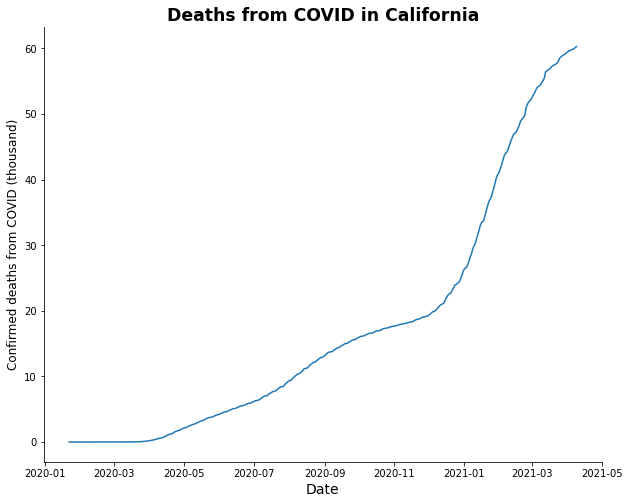

In [86]:
state = "California"

deaths_state_df = (
    us_deaths_by_state_df[us_deaths_by_state_df["Province_State"] == state]
    .drop(
        ["Province_State", "UID", "code3", "FIPS", "Lat", "Long_", "Population"], axis=1
    )
    .copy()
)

# Convert date column names to datetime
deaths_state_df.columns = pd.to_datetime(deaths_state_df.columns)

dates = deaths_state_df.columns
confirmed = deaths_state_df.iloc[0, :] / 1000

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(
    f"Deaths from COVID in {state}",
    fontsize="xx-large",
    fontweight="bold",
)
ax.plot(dates, confirmed)
ax.set_ylabel("Confirmed deaths from COVID (thousand)", fontsize="large")
ax.set_xlabel("Date", fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

### National deaths

The national deaths in the US from the US dataset.



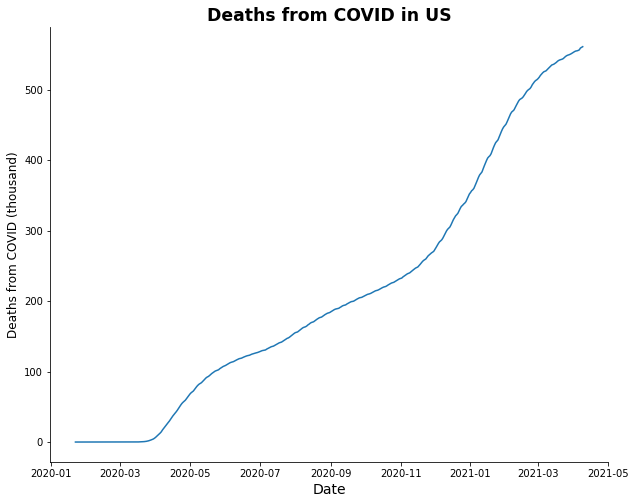

In [87]:
# US total confirmed cases
us_data = (
    us_deaths_df.drop(
        [
            "UID",
            "iso2",
            "iso3",
            "code3",
            "FIPS",
            "Admin2",
            "Province_State",
            "Country_Region",
            "Lat",
            "Long_",
            "Combined_Key",
            "Population",
        ],
        axis=1,
    )
    .sum(axis=0)
    .copy()
)

# Convert date strings to datetime
us_data.index = pd.to_datetime(us_data.index)

dates = us_data.index
confirmed = us_data / 1000

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(
    f"Deaths from COVID in US",
    fontsize="xx-large",
    fontweight="bold",
)
ax.plot(dates, confirmed)
ax.set_ylabel("Deaths from COVID (thousand)", fontsize="large")
ax.set_xlabel("Date", fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

---

<a id="country-specific"></a>

## Load the country-specific data



In [98]:
# Country-specific Data: to analyze the current global scenario.
country_specific_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"
country_specific_df = pd.read_csv(country_specific_path)

print(f"Shape of country specific data = {country_specific_df.shape}")

country_specific_df.head()

Shape of country specific data = (192, 14)


,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-04-10 05:20:59,33.93911,67.709953,57019.0,2521.0,51961.0,2537.0,146.471693,NaN,NaN,4.421333,4,AFG
1,Albania,2021-04-10 05:20:59,41.15330,20.168300,127795.0,2304.0,96672.0,28819.0,4440.718604,NaN,NaN,1.802887,8,ALB
2,Algeria,2021-04-10 05:20:59,28.03390,1.659600,118251.0,3123.0,82392.0,32736.0,269.665194,NaN,NaN,2.640992,12,DZA
3,Andorra,2021-04-10 05:20:59,42.50630,1.521800,12456.0,120.0,11732.0,604.0,16121.141526,NaN,NaN,0.963391,20,AND
4,Angola,2021-04-10 05:20:59,-11.20270,17.873900,23242.0,549.0,21589.0,1104.0,70.716882,NaN,NaN,2.362103,24,AGO


In [89]:
country_specific_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

### People_Hospitalized and People_Tested

There are fields for People_Hospitalized and People_Tested, but these do not contain any data.


In [90]:
print(len(country_specific_df[country_specific_df['People_Hospitalized'].notna()]))
print(len(country_specific_df[country_specific_df['People_Tested'].notna()]))

0
0


### Countries with highest Incident rates

In [91]:
# The top ten countries with highest Incident rates
country_specific_df[
    [
        "Country_Region",
        "Incident_Rate",
        "Confirmed",
        "Deaths",
        "Recovered",
        "Active",
        "Mortality_Rate",
    ]
].sort_values(by=["Incident_Rate"], ascending=False).head(10)

,Country_Region,Incident_Rate,Confirmed,Deaths,Recovered,Active,Mortality_Rate
3,Andorra,16121.141526,12456.0,120.0,11732.0,604.0,0.963391
119,Montenegro,14935.308934,93803.0,1354.0,87768.0,4681.0,1.443451
46,Czechia,14690.033096,1573153.0,27617.0,1437295.0,108241.0,1.755519
148,San Marino,14567.741175,4944.0,85.0,4419.0,440.0,1.719256
157,Slovenia,10808.386229,224699.0,4100.0,206688.0,13911.0,1.824663
103,Luxembourg,10138.887114,63467.0,763.0,59168.0,3536.0,1.202200
84,Israel,9654.786454,835674.0,6280.0,825195.0,4199.0,0.751489
178,US,9434.672561,31084065.0,561058.0,NaN,NaN,1.804970
12,Bahrain,9066.851279,154280.0,550.0,142741.0,10989.0,0.356495
57,Estonia,8525.795322,113098.0,1006.0,92862.0,19230.0,0.889494


### Countries with highest Mortality rates

In [92]:
# The top ten countries with highest mortality rates
country_specific_df[
    [
        "Country_Region",
        "Mortality_Rate",
        "Confirmed",
        "Deaths",
        "Recovered",
        "Active",
        "Incident_Rate",
    ]
].sort_values(by=["Mortality_Rate"], ascending=False).head(10)

,Country_Region,Mortality_Rate,Confirmed,Deaths,Recovered,Active,Incident_Rate
104,MS Zaandam,22.222222,9.0,2.0,7.0,0.0,NaN
189,Yemen,19.529906,5233.0,1022.0,1987.0,2224.0,17.545114
114,Mexico,9.111539,2272064.0,207020.0,1765244.0,299800.0,1777.935172
168,Syria,6.797281,20008.0,1360.0,13780.0,4868.0,114.327136
164,Sudan,6.480696,31833.0,2063.0,24214.0,5556.0,72.596421
53,Egypt,5.918344,208876.0,12362.0,158454.0,38060.0,204.111222
52,Ecuador,5.007033,342678.0,17158.0,290314.0,35206.0,1942.282121
159,Somalia,4.930324,12271.0,605.0,5129.0,6537.0,77.209029
36,China,4.747481,102012.0,4843.0,96715.0,454.0,7.262314
20,Bolivia,4.428307,280649.0,12428.0,230021.0,38200.0,2404.251716


### Countries with highest Active

In [93]:
# The top ten countries with highest Active
country_specific_df[
    [
        "Country_Region",
        "Active",
        "Confirmed",
        "Deaths",
        "Recovered",
        "Incident_Rate",
        "Mortality_Rate",
    ]
].sort_values(by=["Active"], ascending=False).head(10)

,Country_Region,Active,Confirmed,Deaths,Recovered,Incident_Rate,Mortality_Rate
62,France,4589425.0,5000314.0,98202.0,312540.0,7660.556092,1.963917
182,United Kingdom,4239416.0,4380167.0,127284.0,13467.0,6452.238668,2.905917
162,Spain,3120808.0,3347512.0,76328.0,150376.0,7159.720964,2.280141
124,Netherlands,1323401.0,1358016.0,16915.0,17700.0,7925.451213,1.245567
23,Brazil,1302275.0,13373174.0,348718.0,11722181.0,6291.499427,2.607593
79,India,979608.0,13060542.0,167642.0,11913292.0,946.413080,1.283576
16,Belgium,894527.0,917917.0,23390.0,NaN,7920.167502,2.548161
166,Sweden,843780.0,857401.0,13621.0,NaN,8489.732426,1.588638
152,Serbia,630759.0,636418.0,5659.0,NaN,7283.862306,0.889195
85,Italy,536361.0,3736526.0,113579.0,3086586.0,6179.975240,3.039695


### Countries with highest Confirmed

In [94]:
# The top ten countries with Confirmed
country_specific_df[
    [
        "Country_Region",
        "Confirmed",
        "Deaths",
        "Recovered",
        "Active",
        "Incident_Rate",
        "Mortality_Rate",
    ]
].sort_values(by=["Confirmed"], ascending=False).head(10)

,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
178,US,31084065.0,561058.0,NaN,NaN,9434.672561,1.804970
23,Brazil,13373174.0,348718.0,11722181.0,1302275.0,6291.499427,2.607593
79,India,13060542.0,167642.0,11913292.0,979608.0,946.413080,1.283576
62,France,5000314.0,98202.0,312540.0,4589425.0,7660.556092,1.963917
142,Russia,4572053.0,100554.0,4200282.0,271217.0,3132.949545,2.199318
182,United Kingdom,4380167.0,127284.0,13467.0,4239416.0,6452.238668,2.905917
177,Turkey,3745657.0,33454.0,3268678.0,443525.0,4441.188566,0.893141
85,Italy,3736526.0,113579.0,3086586.0,536361.0,6179.975240,3.039695
162,Spain,3347512.0,76328.0,150376.0,3120808.0,7159.720964,2.280141
66,Germany,2990724.0,78295.0,2654930.0,257499.0,3569.566938,2.617928


### Countries with highest Deaths

In [95]:
# The top ten countries with highest Active
country_specific_df[
    [
        "Country_Region",
        "Deaths",
        "Confirmed",
        "Recovered",
        "Active",
        "Incident_Rate",
        "Mortality_Rate",
    ]
].sort_values(by=["Deaths"], ascending=False).head(10)

,Country_Region,Deaths,Confirmed,Recovered,Active,Incident_Rate,Mortality_Rate
178,US,561058.0,31084065.0,NaN,NaN,9434.672561,1.804970
23,Brazil,348718.0,13373174.0,11722181.0,1302275.0,6291.499427,2.607593
114,Mexico,207020.0,2272064.0,1765244.0,299800.0,1777.935172,9.111539
79,India,167642.0,13060542.0,11913292.0,979608.0,946.413080,1.283576
182,United Kingdom,127284.0,4380167.0,13467.0,4239416.0,6452.238668,2.905917
85,Italy,113579.0,3736526.0,3086586.0,536361.0,6179.975240,3.039695
142,Russia,100554.0,4572053.0,4200282.0,271217.0,3132.949545,2.199318
62,France,98202.0,5000314.0,312540.0,4589425.0,7660.556092,1.963917
66,Germany,78295.0,2990724.0,2654930.0,257499.0,3569.566938,2.617928
162,Spain,76328.0,3347512.0,150376.0,3120808.0,7159.720964,2.280141


---

<a id="conclusion"></a>

## Conclusion

The structure of the data for the csse_covid_19_time_series follow the same structure. In the global data the country/region is specified in one field (column) and there is a column with cumulative results for each day that data was collected. As time progresses a new column is added for each day with the current total for the country/region on that day. The structure for the Confirmed Cases, Deaths and Recovered is the same. 
 


### Global Data:

The confirmed dataset contains 274 rows consisting of 192 unique country/regions. There are seven countries with multiple entries in Country/Region field. This is done to provide more information for Province/State. 

* 'Australia',
* 'Canada',
* 'China',
* 'Denmark',
* 'France',
* 'Netherlands',
* 'United Kingdom'

A closer look at Australia shows that the numbers are broken down into 8 Province/States. The data can be grouped by Country/Region to get the total numbers per country.

Group data by 'Country/Region' to get a single daily number for each country. The global confirmed cases can be obtained by totalling the columns in the dataset.
There are 134,545,099 confirmed cases globally as of April 09 2021.


The deaths dataset has the same layout as the confirmed dataset. This includes the same seven countries with multiple entries in Country/Region field. 

Group data by 'Country/Region' to get a single daily number for each country. US has highest number of deaths from COVID - 561,058 as of April 09 2021.

The global Deaths can be obtained by totalling the columns in the dataset.
2,914,590 deaths from COVID globally as of April 09 2021.

It appears that not all countries have provided data on recovered cases. 
There are 4 countries with zero recovered:  
* Sweden
* US
* Serbia
* Belgium

76,431,322 recovered from COVID globally as of April 09 2021.


### US Data

The US country data follows a similar structure to that of the Global data.  
The confirmed dataset for the US contains 3340 rows. The Province_State field contains a list of 58 unique
Province_States, which is made up of the 50 states plus territories and cruise ships.

Each of the Province_States contain multiple entries, with data for different sub-regions. These sub-regions are in a field called "Admin2". There are a number of cases in states without any futher sub-regions assigned - a value of 'Unassigned' is seen in Admin2 field. The "Combined_Key" field seems to be a combination of the country, the state and the county/region. 

The data can be grouped by 'Province_State' to get the total numbers per State.
California has the highest confirmed - 3,692,777, as of April 09 2021.


The Deaths dataset for the US data structure is similar to the Confirmed Cases except with the addition of a field for Population. This field is not present in the Confirmed Cases data, but could be used with both sets of data to determine numbers per state. The deaths dataset for the US contains 3340 rows. 

The data can be grouped by Province_State to get the total numbers per State.

5 states with highest number of deaths as of April 09 2021:  
1. California (60,270)
2. New York (50,977)
3. Texas (49,121)
4. Florida (33,968)
5. Pennsylvania (25,358)




### Contry Specific Data

The Country specific Data is a different structure to the other datasets. It consists of 192 rows (one for each country) and 14 fields. Some of these fields 'Lat', 'Long_' and 'ISO3' could be used to join to Geographical data to produce maps. There are fields for People_Hospitalized and People_Tested, but these do not contain any data.

The remaining fields could be used to compare countries and determine the highest in certain categories:
* Confirmed
* Deaths
* Recovered
* Active
* Incident_Rate
* Mortality_Rate  



### Questions that can be answered with this data:  

1. How many confirmed cases of COVID are there globally?  
1. How many deaths from COVID are there globally?  
1. Which country has the highest number of confirmed cases of COVID?  
1. Which country has the highest number of deaths from COVID?  
1. What is the rate of new cases or new deaths from COVID on a daily basis (Globally or per country or per State)?
1. What is the rolling average of new cases or new deaths from COVID (Globally or per country or per State)?
1. Number of cases or deaths per population in each US State?

 